In [131]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [132]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data=pd.read_csv(r"D:\Data Science\Machine Learning\GITHUB\TAXI\Iris\Iris\iris.csv", names=names)

In [133]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Basic informations

In [134]:
data.shape

(150, 5)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [136]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Frequency count for categorical columns

In [137]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

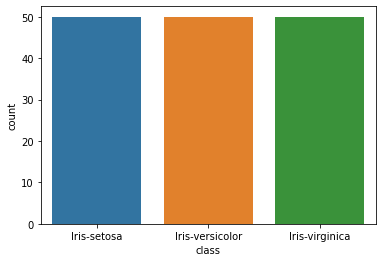

In [138]:
sns.countplot(data['class'])

<AxesSubplot:xlabel='class', ylabel='sepal-width'>

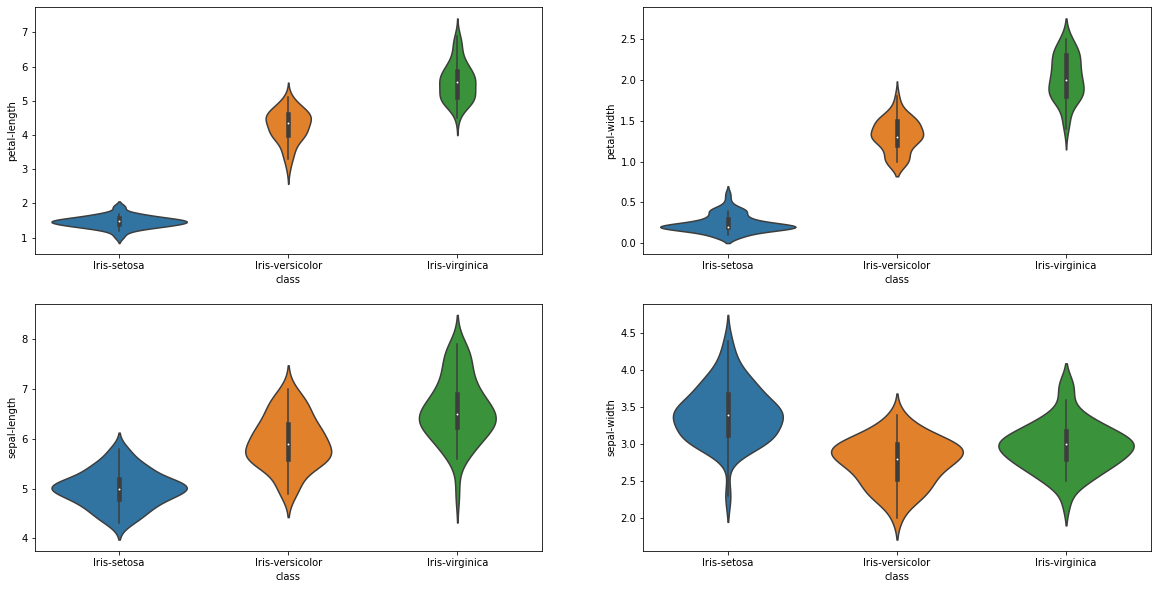

In [139]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal-length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal-width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal-length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal-width',data=data)

## Observations 
###### PLOT 1- if petal length <2, then it is Iris-Setosa
###### PLOT 2- if petal length <.75, then it is Iris-Setosa
###### PLOT 3- if sepal length >7.5, then it is Iris-virginica
###### PLOT 4- if sepal length >4, then it is Iris-Setosa


Univariavte analysis for numerical values

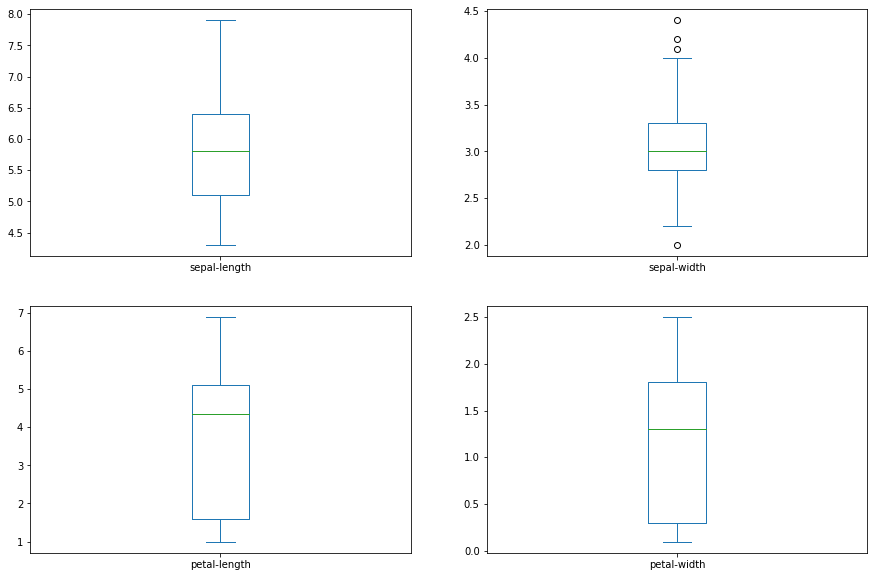

In [140]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(15, 10))
plt.show()

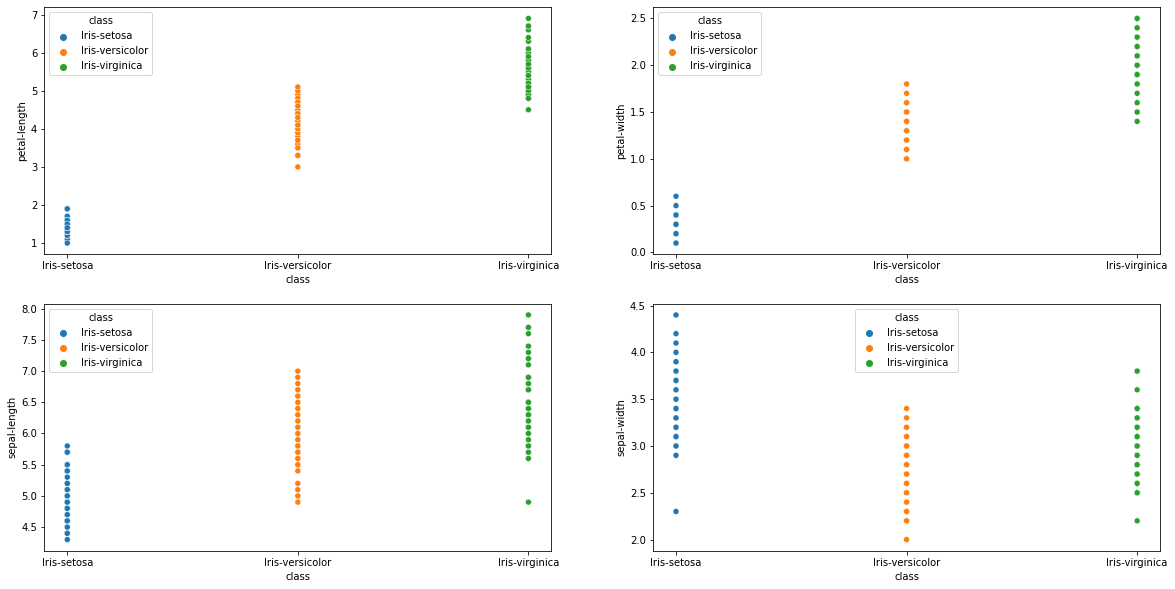

In [141]:
plt.figure(figsize=(20,10))
for index, i in enumerate(['petal-length','petal-width','sepal-length','sepal-width']):
    plt.subplot(2,2,index+1)
    sns.scatterplot(x='class', y=i, data=data, hue='class')

# UNIVARIATE ANALYSIS

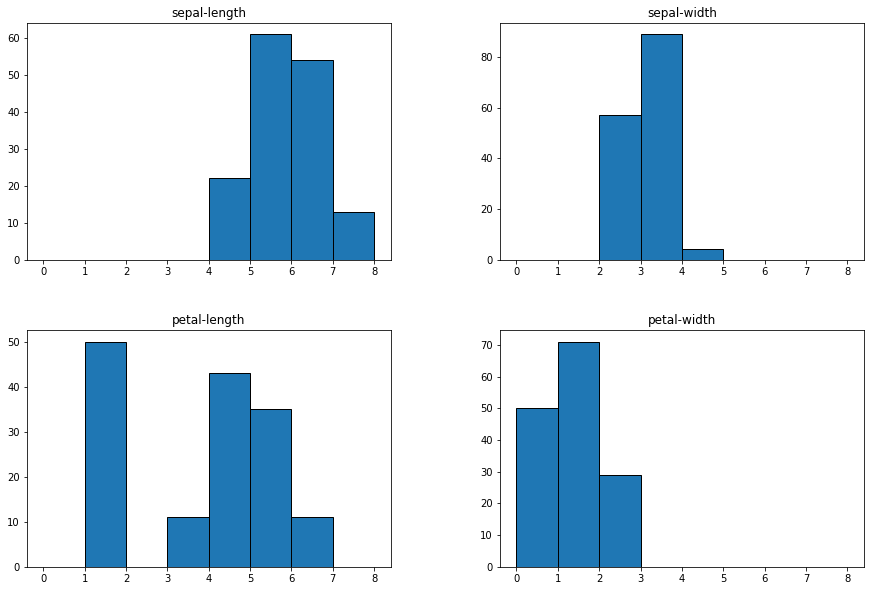

In [142]:
data.hist(bins=[0,1,2,3,4,5,6,7,8],figsize=(15, 10), grid=False, edgecolor='black')
plt.show()

In [143]:
data['sepal-length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal-length, dtype: float64

In [144]:
"""for i in range(4,9):
    print(i,data[(data['sepal-length']>=i) & (data['sepal-length']<(i+1))]['sepal-length'].count())"""

"for i in range(4,9):\n    print(i,data[(data['sepal-length']>=i) & (data['sepal-length']<(i+1))]['sepal-length'].count())"

In [145]:
numeric_data=data.iloc[:,:-1]
numeric_data

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Multivariate analysis using pairplot

<Figure size 1440x1440 with 0 Axes>

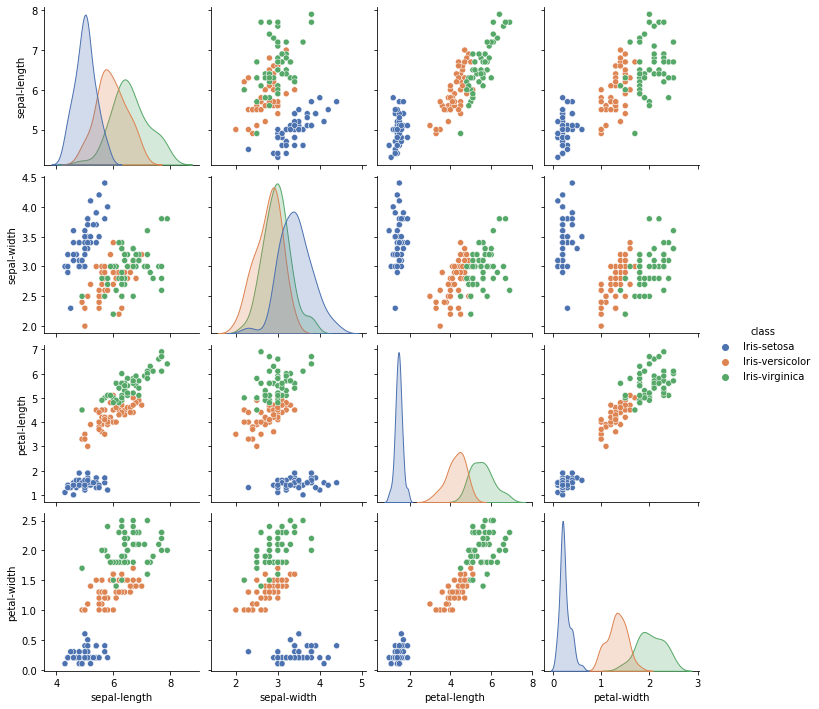

In [146]:
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='class', palette='deep')
plt.show()

multivariate analysis using Heatmap

In [147]:
cor = numeric_data.corr()
cor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

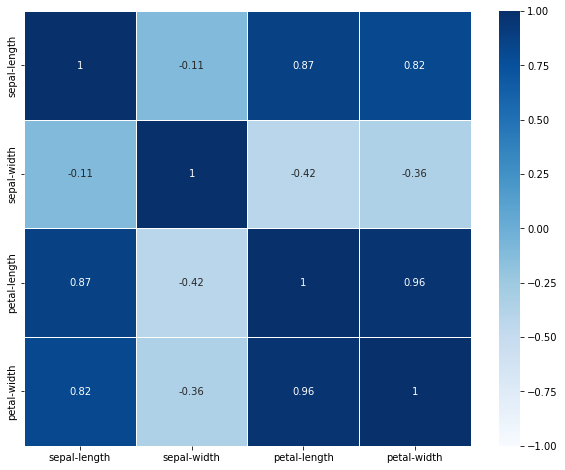

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='Blues',vmin=-1,vmax=1, linecolor='white',linewidth=1)

In [149]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_map=data['class'].unique()
data['class']= label_encoder.fit_transform(data['class'])
print(iris_map)
data['class'].unique()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


array([0, 1, 2])

Splitting into train and test

In [150]:
X=numeric_data
y=data['class']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=55)

In [153]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)
(120,)
(30, 4)


## Model Building

### Logistic regression

In [154]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='multinomial')

In [155]:
model_log=logistic.fit(x_train,y_train)

In [156]:
print("Intercept", logistic.intercept_)
print("Coefficient", logistic.coef_)

Intercept [  8.80328967   2.06078158 -10.86407125]
Coefficient [[-0.38328209  0.95140579 -2.34336131 -1.0093007 ]
 [ 0.60216551 -0.52814772 -0.17639404 -0.92031579]
 [-0.21888342 -0.42325806  2.51975534  1.92961649]]


In [157]:
y_pred=model_log.predict(x_test)
y_pred

array([0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1])

In [158]:
model_log.score(x_train,y_train)

0.9833333333333333

In [159]:
model_log.score(x_test,y_test)

0.9666666666666667

Classification report

In [160]:
from sklearn.metrics import classification_report, f1_score

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Decision tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
model_dt=DecisionTreeClassifier(max_depth=3)

In [164]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

|--- petal-width <= 0.80
|   |--- class: 0
|--- petal-width >  0.80
|   |--- petal-width <= 1.75
|   |   |--- petal-length <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal-length >  4.95
|   |   |   |--- class: 2
|   |--- petal-width >  1.75
|   |   |--- class: 2



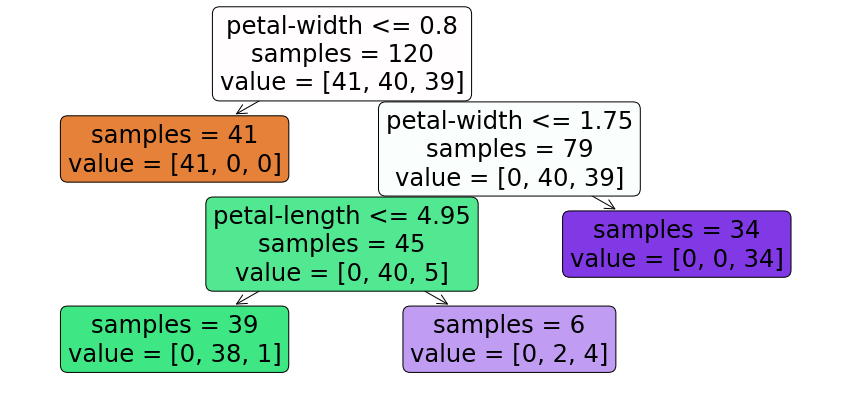

In [165]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(model_dt, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(x_train.columns))
print( export_text(model_dt, feature_names = list(x_train.columns)))

In [166]:
ydt_pred_train=model_dt.predict(x_train)
ydt_pred_train

array([0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2,
       0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 1, 0, 2, 0])

In [167]:
model_dt.score(x_train,y_train)

0.975

In [168]:
ydt_pred_test=model_dt.predict(x_test)
ydt_pred_test

array([0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1])

In [169]:
model_dt.score(x_test,y_test)

0.9666666666666667

In [170]:
print(classification_report(y_train, ydt_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=2, min_samples_leaf=10)

In [173]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=10, random_state=100)

In [174]:
yrf_pred_train=model_rf.predict(x_train)

In [175]:
model_rf.score(x_train,y_train)

0.9583333333333334

In [176]:
model_rf.score(x_test,y_test)

0.9666666666666667

In [177]:
print(classification_report(y_train, yrf_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.93        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### XG Boost

In [178]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing
import time

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
train_labels_b = y_train.values
test_labels_b = y_test.values
matrix_train_b = xgboost.DMatrix(x_train,label=train_labels_b)
matrix_test_b = xgboost.DMatrix(x_test,label=test_labels_b)

In [ ]:
params = {
    'max_depth': 3, 
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    #'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train_b,
                    num_boost_round=300,    #Number of trees
                    early_stopping_rounds=3, # Stop after 3 rounds, if test error doesn't improve. 
                    evals=[(matrix_test_b,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.03333
[1]	test-merror:0.03333
[2]	test-merror:0.03333
Time taken by XGB 0.028006315231323242 Seconds


In [ ]:
###prediction using XGB on the train Data
model_xgb_train=model.predict(matrix_train_b)

accuracy_train=f1_score(train_labels_b, model_xgb_train, average='micro') 
print("train accuracy", accuracy_train)

train accuracy 0.975


In [ ]:
###prediction using XGB on the test Data
model_xgb_test=model.predict(matrix_test_b)

accuracy_test=f1_score(test_labels_b, model_xgb_test, average='micro') 
print("test accuracy", accuracy_test)

test accuracy 0.9666666666666667
